In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
tf.config.run_functions_eagerly(True)

import os, warnings
warnings.filterwarnings("ignore")

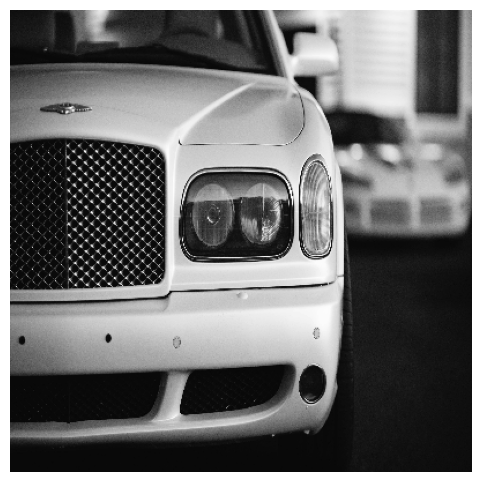

In [3]:
image_path = 'car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show();

In [13]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

In [14]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [16]:
conv_fn = tf.nn.conv2d

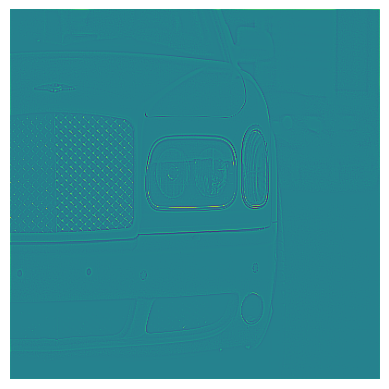

In [17]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

In [18]:
relu_fn = tf.nn.relu

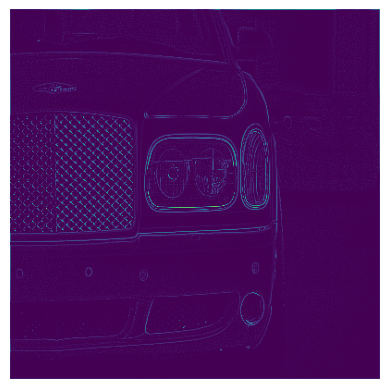

In [19]:
image_detect = relu_fn(image_filter)

plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

In [20]:
import sympy
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))

image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

In the tutorial, we talked about how the pattern of positive numbers will tell you the kind of features the kernel will extract. This kernel has a vertical column of 1's, and so we would expect it to return features of vertical lines.

In [21]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

# The first matrix is the image after convolution, and the second is
# the image after ReLU.
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0   0    0  0⎤
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0  -1.0  0  0⎥
⎢                     ⎥
⎣-2.0  2.0  -1.0  0  0⎦

⎡0  2.0  0  0  0⎤
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎣0  2.0  0  0  0⎦